In [21]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
from PIL import Image
import requests
import torch
import cv2
import matplotlib.pyplot as plt

In [3]:
MODEL_NAME = "CIDAS/clipseg-rd64-refined"

processor = CLIPSegProcessor.from_pretrained(MODEL_NAME)
model = CLIPSegForImageSegmentation.from_pretrained(MODEL_NAME)

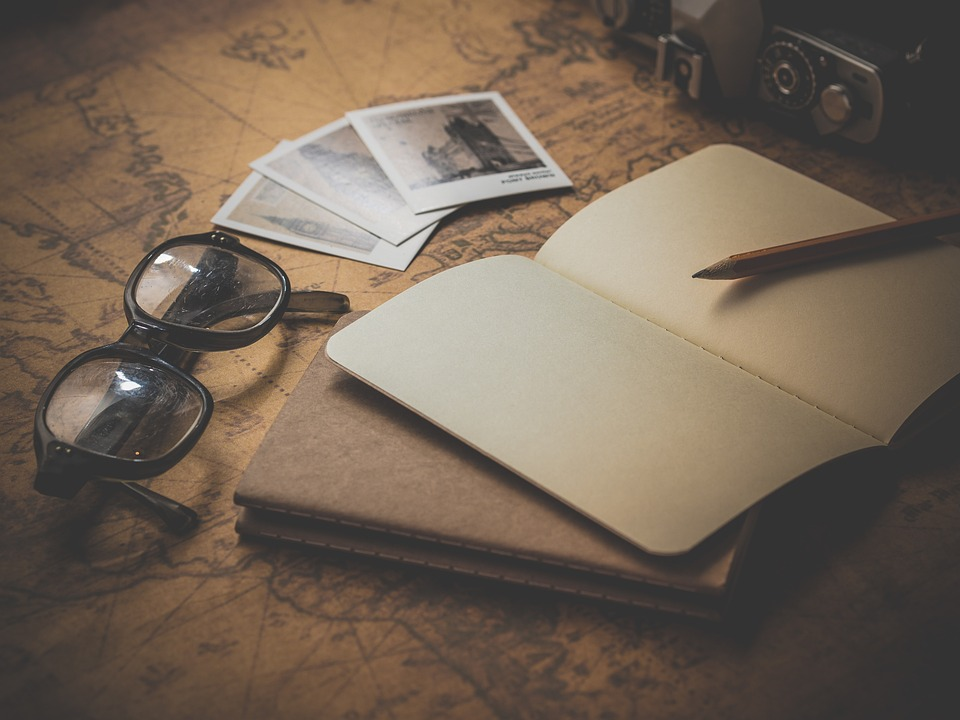

In [4]:
url = "https://cdn.pixabay.com/photo/2016/01/09/18/28/notepad-1130743_960_720.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [5]:
prompts = ["a glasses", "notepad", "pencil", "photos"]

In [11]:
inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

In [12]:
with torch.no_grad():
    outputs = model(**inputs)

In [13]:
predictions = outputs.logits.unsqueeze(1)

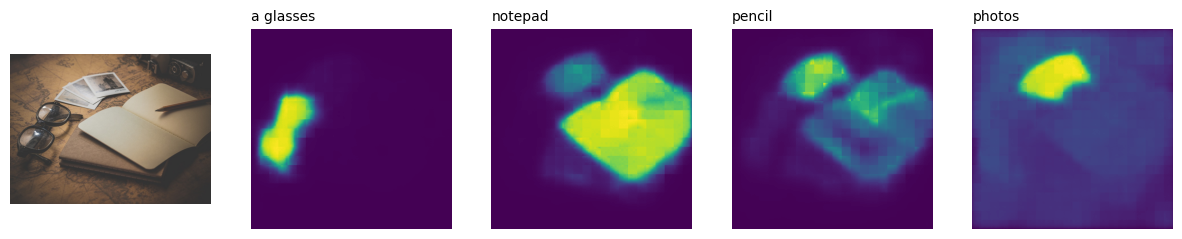

In [14]:
fig, ax = plt.subplots(1, 5, figsize=(15, 4))
for a in ax:
    a.axis('off')

ax[0].imshow(image)
for i in range(4):
    ax[i+1].imshow(torch.sigmoid(predictions[i][0]))
    ax[i+1].text(0, -15, prompts[i])

plt.show()

In [20]:
for i in range(4):
    plt.imsave(f"image{i}.png", torch.sigmoid(predictions[i][0]))

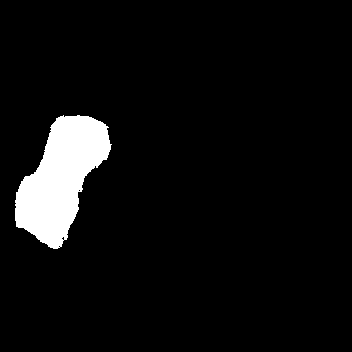

In [32]:
mask_array = []
for i in range(4):
    img = cv2.imread(f"image{i}.png")
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (thresh, bw_image) = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
    cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB)
    mask_array.append(bw_image)
    
Image.fromarray(mask_array[0])

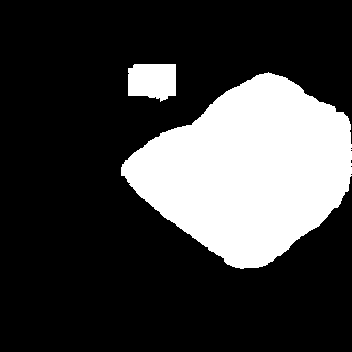

In [33]:
Image.fromarray(mask_array[1])

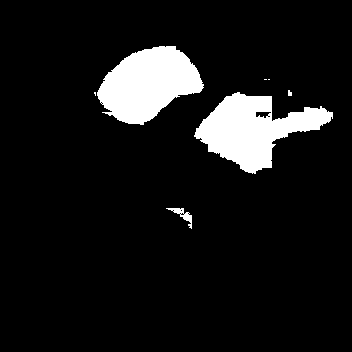

In [34]:
Image.fromarray(mask_array[2])

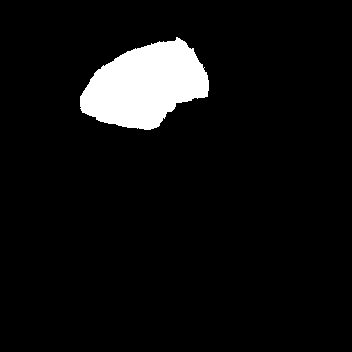

In [35]:
Image.fromarray(mask_array[3])